In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats

# loading the data
data = pd.read_csv("eop_indexes", index_col='Id') 
data.head()  

,Age,Gender,Occupation,Marital_Status,Education,Social_habits,Present_Illness_Comorbid_Conditions,Chronic_Comorbid_Conditions,Vitals,No_Of_Medicine_Per_Day,...,Adverse_Effects_Of_Medication,Adverse_Effects,Medication_Causing_Adverse_Effects,Medication_Dosage,Quality_Of_Life_Effected,CCI,CPS,SYMPTOM_BURDEN,TEN_YEAR_SURVIVAL_PERCENTAGE,ROP
Id,,,,,,,,,,,,,,,,,,,,,
1,68,0,None,Married,None,none,Hypertension,Hypertension,Temp-N-B.p- 130/90mmhg-RBS- 90mg/dl-Pulse rate...,6,...,no,None,None,None,1,3,7,0,77.48,1
2,67,1,Employed,Married,None,"alcohol, smoking",type II DM,Diabetes Mellitus,Temp- N -B.p- 110/70mmhg-Pulse rate- 82 b/min-...,8,...,no,None,None,None,1,3,9,0,77.48,1
3,67,1,Employed,Married,High school,smoking,Stroke,Stroke,temp-N-B.p-170/90mmHg-pulse rate-89 b/min-RBS-...,6,...,no,None,None,None,1,3,7,0,77.48,1
4,68,1,None,Married,Graduate,"alcohol, chewing tobacco",hypertension with type II DM,"Hypertension,Diabetes Mellitus",Temp-N -B.P- 140/90 mmhg-pulse rate - 74b/min-...,7,...,no,None,None,None,1,4,9,0,53.39,1
5,72,1,Employed,Married,None,"alcohol, smoking",hypertension,Hypertension,Temp- N -B.P- 130/90mmhg -Pulse rate - 78b/min...,6,...,no,None,None,None,1,4,7,0,53.39,1


In [2]:
data.SYMPTOM_BURDEN.value_counts() 

0    206
1    109
Name: SYMPTOM_BURDEN, dtype: int64

In [3]:
round(109 / 315  * 100, 2) 

34.6

In [4]:
data.Quality_Of_Life_Effected.value_counts()

0    269
1     46
Name: Quality_Of_Life_Effected, dtype: int64

In [5]:
# COMORBIDITY POLYPHARMACY SCORE
data.CPS.min(), data.CPS.max(), data.CPS.mean(), data.CPS.std() 

(4, 19, 8.485714285714286, 1.8824412546857956)

In [6]:
data[(data.No_Of_Medicine_Per_Day >= 5) & (data.No_Of_Medicine_Per_Day <= 7)] 

,Age,Gender,Occupation,Marital_Status,Education,Social_habits,Present_Illness_Comorbid_Conditions,Chronic_Comorbid_Conditions,Vitals,No_Of_Medicine_Per_Day,...,Adverse_Effects_Of_Medication,Adverse_Effects,Medication_Causing_Adverse_Effects,Medication_Dosage,Quality_Of_Life_Effected,CCI,CPS,SYMPTOM_BURDEN,TEN_YEAR_SURVIVAL_PERCENTAGE,ROP
Id,,,,,,,,,,,,,,,,,,,,,
1,68,0,None,Married,None,none,Hypertension,Hypertension,Temp-N-B.p- 130/90mmhg-RBS- 90mg/dl-Pulse rate...,6,...,no,None,None,None,1,3,7,0,77.48,1
3,67,1,Employed,Married,High school,smoking,Stroke,Stroke,temp-N-B.p-170/90mmHg-pulse rate-89 b/min-RBS-...,6,...,no,None,None,None,1,3,7,0,77.48,1
4,68,1,None,Married,Graduate,"alcohol, chewing tobacco",hypertension with type II DM,"Hypertension,Diabetes Mellitus",Temp-N -B.P- 140/90 mmhg-pulse rate - 74b/min-...,7,...,no,None,None,None,1,4,9,0,53.39,1
5,72,1,Employed,Married,None,"alcohol, smoking",hypertension,Hypertension,Temp- N -B.P- 130/90mmhg -Pulse rate - 78b/min...,6,...,no,None,None,None,1,4,7,0,53.39,1
6,66,0,None,Married,None,none,type II DM,Diabetes Mellitus,Temp- N -B.P - 130/80mmhg -Pulse rate- 83b/min...,5,...,no,None,None,None,1,3,6,0,77.48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,70,0,None,Widow,Elementary,none,"Hypertension, hepatitis","Hypertension,Hepatitis",Temp- N-B.p-150/90mmHg-Pulse rate- 80b/min-RBS...,6,...,no,None,None,None,0,5,8,0,21.36,1
312,65,0,None,Married,None,none,"Hypertension, hypothyroidism","Hypertension,Hypothyroidism",Temp- N-B.P-160/90mmHg-Pulse rate - 89b/min-RB...,6,...,no,None,None,None,0,4,8,0,53.39,1
313,65,0,None,Married,None,none,Type II DM uncontrolled,Uncontrolled Diabetes Mellitus,Temp-N-B.P-110/80mmHg-Pulse rate - 85b/min-RBS...,6,...,no,None,None,None,0,4,7,0,53.39,1


In [12]:
data.No_Of_Medicine_Per_Day.mean(), data.No_Of_Medicine_Per_Day.std() 

(6.768253968253968, 1.6121380151465643)

In [8]:
# RATE OF POLYMORPHACY
# encoding 0: LESS THAN 5 
#          1: BETWEEN 5 and 7 
#          2: 8 AND ABOVE

ROP_LABELS = [0, 1, 2]
ROP_BINS = [0, 5, 8, 20]
data['ROP'] = pd.cut(data['No_Of_Medicine_Per_Day'], bins=ROP_BINS, labels=ROP_LABELS)
data.ROP.value_counts() 

1    233
0     50
2     32
Name: ROP, dtype: int64

In [9]:
from zepid import RiskRatio, OddsRatio

# CALCULATING ODDS RATIO
ODDS = OddsRatio()
ODDS.fit(data, exposure='ROP', outcome='SYMPTOM_BURDEN')
ODDS.summary() 

Comparison:0 to 1
+-----+-------+-------+
|     |   D=1 |   D=0 |
+=====+=======+=======+
| E=1 |    99 |   134 |
+-----+-------+-------+
| E=0 |     2 |    48 |
+-----+-------+-------+ 

Comparison:0 to 2
+-----+-------+-------+
|     |   D=1 |   D=0 |
+=====+=======+=======+
| E=1 |     8 |    24 |
+-----+-------+-------+
| E=0 |     2 |    48 |
+-----+-------+-------+ 

                           Odds Ratio                                 
       OddsRatio  SD(OR)  OR_LCL  OR_UCL
Ref:0      1.000     NaN     NaN     NaN
1         17.731   0.734   4.209  74.699
2          8.000   0.829   1.575  40.632
----------------------------------------------------------------------
Missing E:    0
Missing D:    0
Missing E&D:  0


C:\Users\SiddarthaBoppana\anaconda3\lib\site-packages\zepid\calc\utils.py:32: UserWarning: At least one cell count is less than 5, therefore confidence interval approximation is invalid
  'interval approximation is invalid', UserWarning)


In [15]:
rr = RiskRatio() 
rr.fit(data, exposure='ROP', outcome='SYMPTOM_BURDEN') 
rr.summary() 

Comparison:0 to 1
+-----+-------+-------+
|     |   D=1 |   D=0 |
+=====+=======+=======+
| E=1 |    99 |   134 |
+-----+-------+-------+
| E=0 |     2 |    48 |
+-----+-------+-------+ 

Comparison:0 to 2
+-----+-------+-------+
|     |   D=1 |   D=0 |
+=====+=======+=======+
| E=1 |     8 |    24 |
+-----+-------+-------+
| E=0 |     2 |    48 |
+-----+-------+-------+ 

                            Risk Ratio                                
        Risk  SD(Risk)  Risk_LCL  Risk_UCL
Ref:0  0.040     0.028    -0.014     0.094
1      0.425     0.032     0.361     0.488
2      0.250     0.077     0.100     0.400
----------------------------------------------------------------------
       RiskRatio  SD(RR)  RR_LCL  RR_UCL
Ref:0      1.000     NaN     NaN     NaN
1         10.622   0.697   2.710  41.640
2          6.250   0.757   1.416  27.582
----------------------------------------------------------------------
Missing E:    0
Missing D:    0
Missing E&D:  0


C:\Users\SiddarthaBoppana\anaconda3\lib\site-packages\zepid\calc\utils.py:32: UserWarning: At least one cell count is less than 5, therefore confidence interval approximation is invalid
  'interval approximation is invalid', UserWarning)


In [16]:
from zepid.calc import odds_ratio, risk_ratio 
risk_ratio(8, 24, 2, 48) 

C:\Users\SiddarthaBoppana\anaconda3\lib\site-packages\zepid\calc\utils.py:32: UserWarning: At least one cell count is less than 5, therefore confidence interval approximation is invalid
  'interval approximation is invalid', UserWarning)


Results(point_estimate=6.25, lower_bound=1.41620607543628, upper_bound=27.582497122084657, standard_error=0.7574628703771559, alpha=0.05, measure='risk ratio')

In [17]:
risk_ratio(99,134,2,48) 

Results(point_estimate=10.622317596566523, lower_bound=2.7097654810109955, upper_bound=41.63962967017699, standard_error=0.6970001180828077, alpha=0.05, measure='risk ratio')

In [19]:
odds_ratio(99,134,2,48)  

Results(point_estimate=17.731343283582092, lower_bound=4.208892991276331, upper_bound=74.69910384794342, standard_error=0.733755429282474, alpha=0.05, measure='odds ratio')

In [18]:
odds_ratio(8, 24, 2, 48) 

Results(point_estimate=8.0, lower_bound=1.5751102295547579, upper_bound=40.632076916985746, standard_error=0.82915619758885, alpha=0.05, measure='odds ratio')

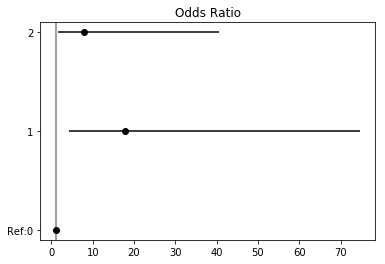

In [10]:
ODDS.plot() 

In [11]:
# CALCULATING ODDS RATIO for QOL 
QOL_ODDS = OddsRatio()
QOL_ODDS.fit(data, exposure='ROP', outcome='Quality_Of_Life_Effected')
QOL_ODDS.summary() 

Comparison:0 to 1
+-----+-------+-------+
|     |   D=1 |   D=0 |
+=====+=======+=======+
| E=1 |    25 |   208 |
+-----+-------+-------+
| E=0 |    17 |    33 |
+-----+-------+-------+ 

Comparison:0 to 2
+-----+-------+-------+
|     |   D=1 |   D=0 |
+=====+=======+=======+
| E=1 |     4 |    28 |
+-----+-------+-------+
| E=0 |    17 |    33 |
+-----+-------+-------+ 

                           Odds Ratio                                 
       OddsRatio  SD(OR)  OR_LCL  OR_UCL
Ref:0      1.000     NaN     NaN     NaN
1          0.233   0.366   0.114   0.478
2          0.277   0.612   0.084   0.921
----------------------------------------------------------------------
Missing E:    0
Missing D:    0
Missing E&D:  0


C:\Users\SiddarthaBoppana\anaconda3\lib\site-packages\zepid\calc\utils.py:32: UserWarning: At least one cell count is less than 5, therefore confidence interval approximation is invalid
  'interval approximation is invalid', UserWarning)
